# DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Clustering Espacial Basado en Densidad de Datos con Ruido

## Desarrollo
Fue desarrollado por dos científicos informáticos, Martin Ester y Hans-Peter Kriegel, junto con sus colegas Jörg Sander y Xiaowei Xu. El algoritmo se presentó en su artículo de 1996 titulado ["A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise"](https://file.biolab.si/papers/1996-DBSCAN-KDD.pdf) (Un algoritmo basado en la densidad para descubrir clústeres en grandes bases de datos espaciales con ruido) en la conferencia [KDD](https://dl.acm.org/conference/kdd) (Knowledge Discovery and Data Mining).

A diferencia de $K$-Means que agrupa los datos por medio de **particiones** determinadas por centroides, DBSCAN es notable por ser un algoritmo de agrupamiento basado en la **densidad**, que agrupa puntos que están muy juntos e identifica los puntos que se encuentran "solos" en regiones de baja densidad, conocidos como ruido.

## Intuición

DBSCAN considera los clústers como áreas de alta densidad separadas por áreas de baja densidad, por ello, los clústers encontrados por DBSCAN pueden tener cualquier forma. (, a diferencia de k-means que supone que los cúmulos tienen forma convexa.)

<table>
  <tr>
    <td><img src="images/dbscan/before_dbscan.png" alt="Image 1"></td>
    <td><img src="images/dbscan/after_dbscan.png" alt="Image 2"></td>
  </tr>
</table>

## Conceptos clave

### 1. Core samples

Un punto se considera un ***core sample*** o ***core point*** si tiene al menos $MinPts$ puntos vecinos dentro de un radio de $\epsilon$ (épsilon), según sea la medida de distancia. Esto indica que el punto se encuentra en una región densa.

### 2. Non-core samples (border point)

Un punto que no tiene suficientes vecinos (al menos $MinPts$) dentro de la distancia $\epsilon$ para ser un *core point*, pero que aún se encuentra dentro de la distancia $\epsilon$ de alguno, se denomina ***border point*** o ***non-core sample***. Estos puntos son parte de un clúster, pero no lo determinan inicialmente.

### 3. Noise Points

Si un punto no es ni un *core sample* ni un *border point*, se considera un ***noise point***. Estos puntos están aislados y no forman parte de ningún clúster.

<img src="images/dbscan/types_points.jpg" alt="Tipos de puntos en DBSCAN" width="650">

### 4. Densidad

El algoritmo tiene dos parámetros, $MinPts$ que es el mínimo número de puntos vecinos que se necesitan para pertenecer a una región densa y $\epsilon$ que es la distancia que determina si los puntos o datos son vecinos entre sí. Estos parámetros definen formalmente lo que queremos decir cuando decimos que es ***denso**. Un valor mayor de $MinPts$ o un valor menor de $\epsilon$ indican una mayor densidad necesaria para formar un clúster.

<img src="images/dbscan/density.png" alt="Visualización de densidad en DBSCAN" width="500">

#### 4.1 Los parámetros $\epsilon$ y $MinPts$
Estos dos parámetros, que son determinados por el usuario, controlan cómo se identifican las regiones de alta densidad que formarán los clústers.

**4.1.1. $\epsilon$**

Si la distancia entre dos puntos o datos es menor o igual a $\epsilon$, se consideran vecinos.

**Criterios para determinar $\epsilon$**

* Distancia de los $k$-vecinos más cercanos ($k$-nearest neighbors distance):\
Un enfoque común es graficar las distancias de los $k$-vecinos más cercanos de cada punto (donde $k$ es el valor de $MinPts$) y buscar la inflexión en la curva (Elbow method). Este método ayuda a identificar un valor de $\epsilon$ que maximiza la detección de clústers.

* Sentido común:\
Si se tienen conocimientos previos sobre el contexto del problema, se puede estimar $\epsilon$ basándose en la distancia esperada entre puntos dentro de un clúster.


* Pruebas iterativas:\
Otra estrategia es probar diferentes valores de $\epsilon$ y observar cómo afecta a la cantidad y calidad de los clusters generados. Los valores demasiado pequeños para $\epsilon$ producirán muchos clusters pequeños o dejarán muchos puntos como ruido. Mientras que los valores demasiado grandes unirán varios clusters o crearán uno solo.


In [7]:
# Importamos las paqueterías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN

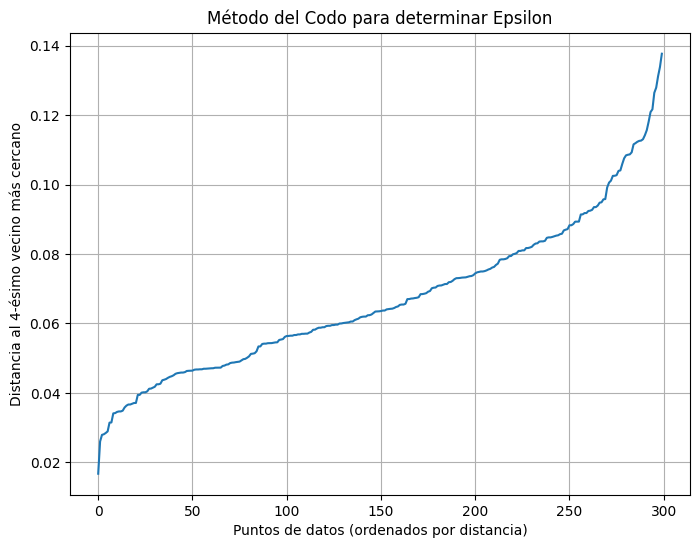

In [6]:
# Generamos un conjunto de datos de ejemplo
X, _ = make_moons(n_samples=300, noise=0.05)

# Definimos el número de vecinos como MinPts
MinPts = 4

# Calculamos los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=MinPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenamos las distancias del k-ésimo vecino más cercano (k = MinPts)
distances = np.sort(distances[:, MinPts-1], axis=0)

# Graficamos las distancias para visualizar el "codo"
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title("Método del Codo para determinar Epsilon")
plt.xlabel("Puntos de datos (ordenados por distancia)")
plt.ylabel(f"Distancia al {MinPts}-ésimo vecino más cercano")
plt.grid(True)
plt.show()


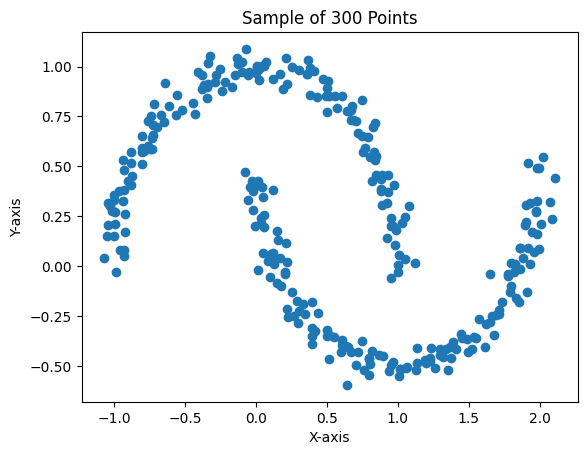

In [49]:
# Extract x and y coordinates
x = X[:, 0]
y = X[:, 1]

# Create a plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample of 300 Points")

# Show the plot
plt.show()

**4.1.2. $MinPts$**

$MinPts$ es el número mínimo de puntos que debe haber en el radio de $\epsilon$ para que un punto sea considerado un *core point*. Este parámetro ayuda a definir la "densidad mínima" necesaria para formar un clúster.

**Criterios para determinar $MinPts$**

* Regla general:\
Un criterio común es definir $MinPts$ como $MinPts = 2 * d$. Donde $d$ es las dimensión de los datos.
Esto significa que en datos 2D (por ejemplo, puntos en un plano), se suele usar $MinPts = 4$. Para datos en 3D, se podrían usar $MinPts = 6$. Esta es una regla empírica que funciona en muchos casos, pero no es definitiva.

* Tamaño mínimo esperado de un cluster:\
Si se tiene idea sobre el tamaño mínimo de los clusters en tu conjunto de datos, se puede establecer $MinPts$ para reflejar eso.

* Densidad esperada:\
Si se tiene información sobre las regiones de densidad alta y si deberían tener más de un cierto número de puntos dentro de una distancia $\epsilon$, puedes ajustar MinPts para asegurarte de que esas regiones sean detectadas como clusters.

* Sensibilidad de $MinPts$:\
Un valor demasiado bajo para $MinPts$ (por ejemplo, $MinPts = 1$) hará que el algoritmo detecte casi todos los puntos como clusters, lo cual no es útil.\
Un valor muy alto puede hacer que DBSCAN clasifique demasiados puntos como ruido.


**Relación entre $\epsilon$ y $MinPts$**

* $\epsilon$ pequeño y $MinPts$ grande:

    Si defines un $\epsilon$ pequeño y un $MinPts$ grande, estarás buscando clústers muy densos. Solo las áreas donde los puntos estén muy cerca unos de otros se considerarán clústers, lo que puede resultar en muchos puntos etiquetados como ruido.

* $\epsilon$ grande y $MinPts$ pequeño:

    Si $\epsilon$ es grande y $MinPts$ es pequeño, cualquier pequeño grupo de puntos relativamente cercanos puede ser considerado un clúster. Esto podría resultar en clústers poco significativos y abarcar grandes áreas que en realidad no deberían formar un clúster.

## Motivación

Cubrir necesidades que otros algoritmos (como $K$-Means) no:

1. Crea clústers de forma arbitraria\
    Algoritmos como $K$-Means tienden a detectar clústers que son esféricos debido a su naturaleza de agrupación basada en la distancia a un centroide.

   DBSCAN puede detectar clústers de cualquier forma por basarse en la densidad local de puntos.

3. No requiere el número de clústers\
    $K$-Means y otros métodos de clustering requieren que el usuario especifique el número de clústers ($K$) antes de comenzar el proceso, lo cual puede llegar a ser complicado.

    DBSCAN no necesita que se especifique el número de clústers. Por tener la capacidad de detectar las áreas densas de los datos y agrupar los puntos en base a.

3. Detección de ruido y puntos atípicos\
    $K$-Means no tienen un mecanismo incorporado para detectar ruido o puntos atípicos (outliers). Cualquier punto en los datos será forzado a pertenecer a un clúster, lo que puede llevar a una mala interpretación de los datos.

    DBSCAN tiene la capacidad de identificar puntos que no pertenecen a ningún cluster. Estos puntos se consideran ruido o outliers y no se agrupan con otros puntos.

4. Agrupamiento basado en densidad\
    DBSCAN está diseñado para encontrar clústers basados en la densidad local de los datos. La idea es que los puntos que están en regiones densas se consideren parte del mismo clúster.

    Este enfoque es eficaz cuando los datos tienen una estructura donde los clústers están definidos por áreas densas de puntos, con regiones de baja densidad entre ellos. Es especialmente útil en problemas donde los clústers no están separados claramente por espacios vacíos, sino por regiones con menos densidad.

5. Manejo de escalas y características múltiples\
    DBSCAN puede aplicarse a datos multidimensionales sin asumir que los clústers tienen formas específicas en esas dimensiones. DBSCAN se adapta mejor a datos complejos porque solo requiere una medida de distancia y un umbral de densidad.

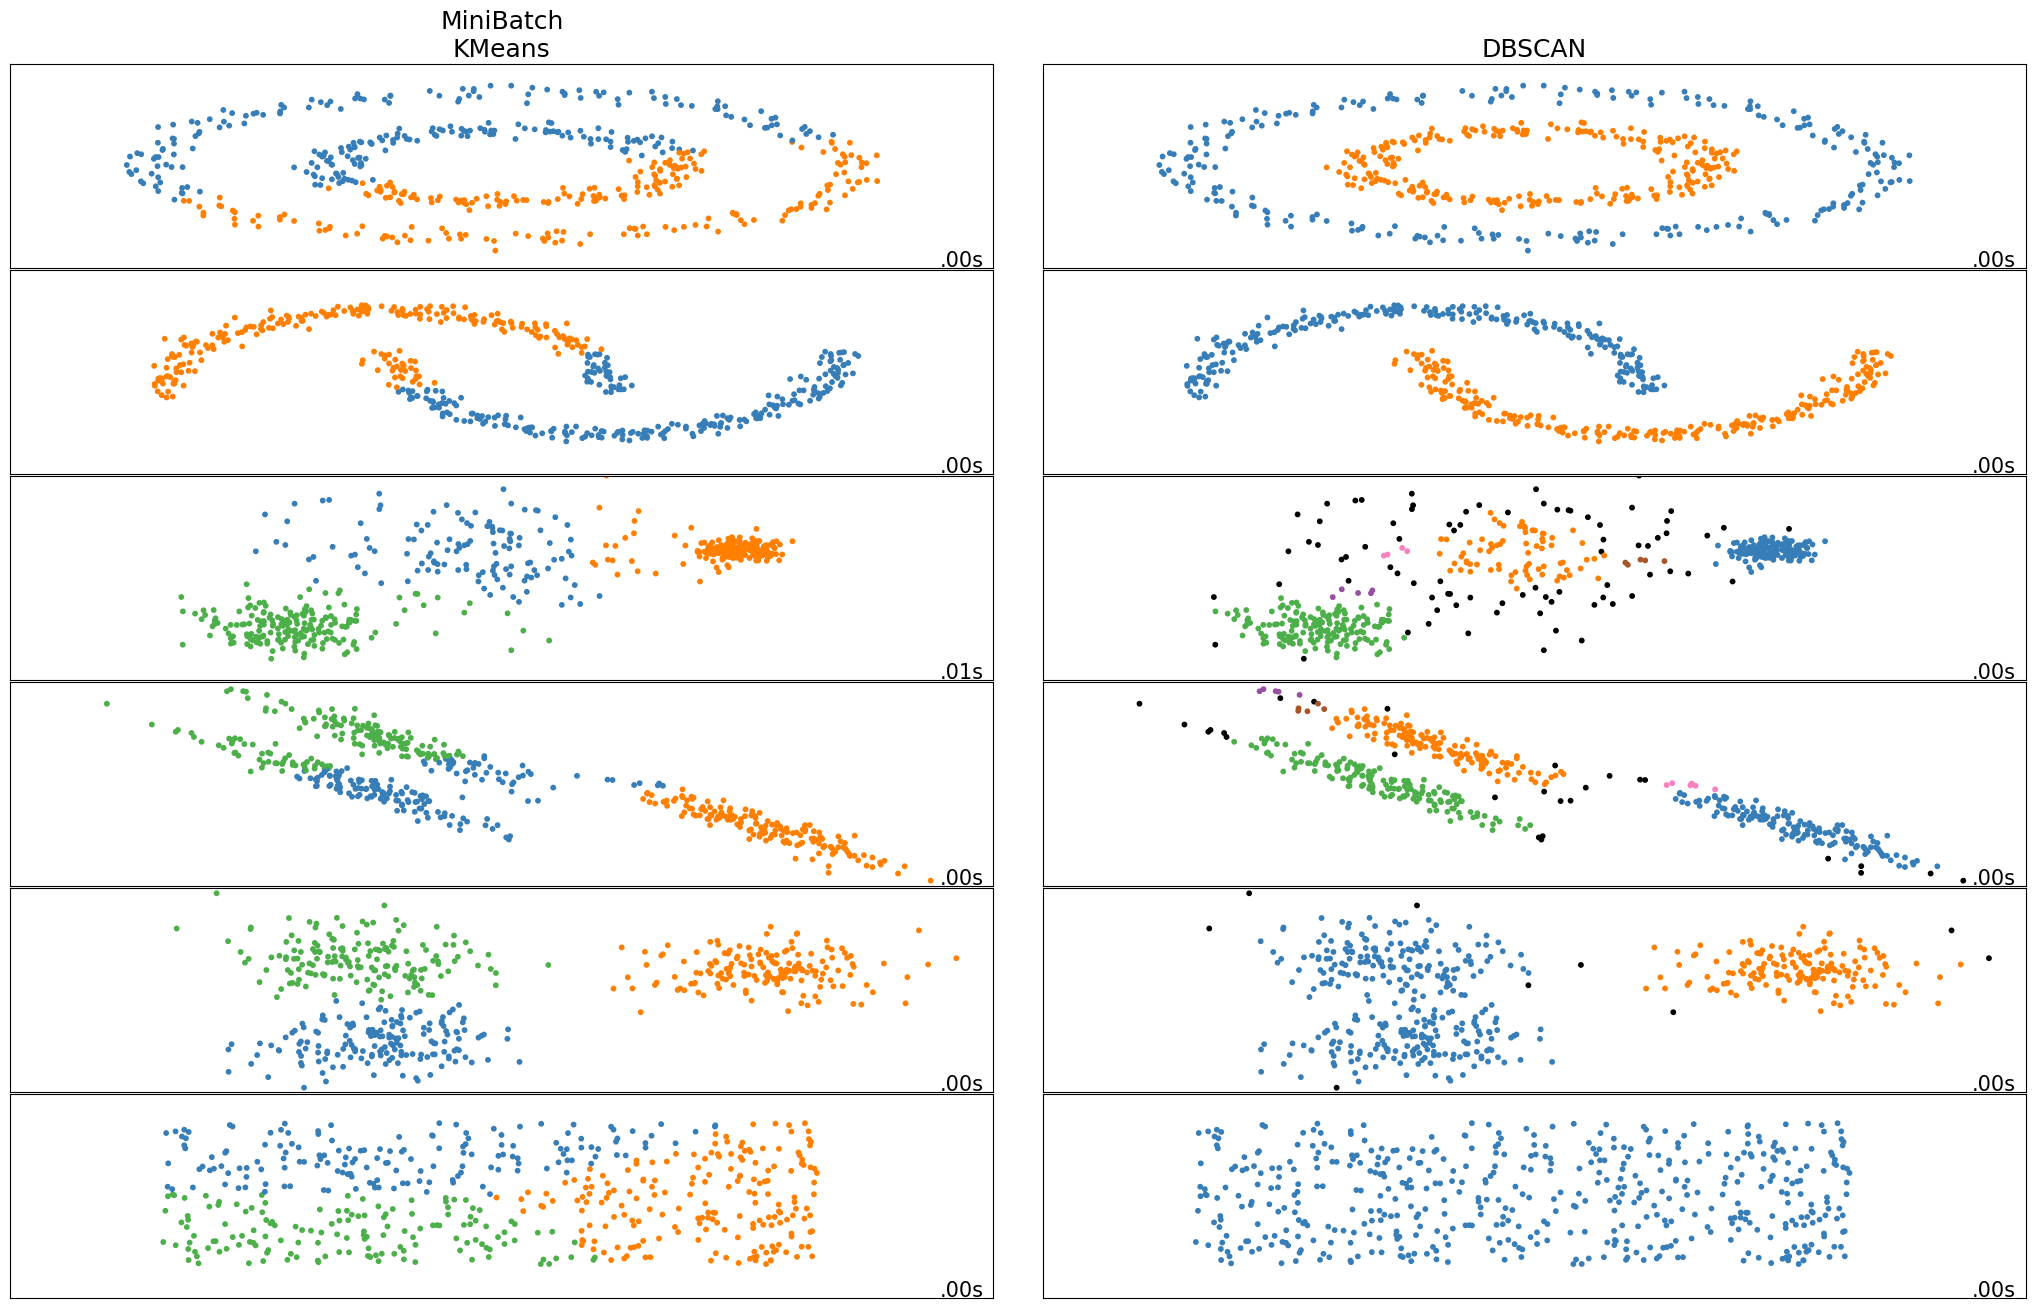

In [50]:
## Gráfico de comparación de los métodos en distintas distribuciones de datos
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        #("Affinity\nPropagation", affinity_propagation),
        #("MeanShift", ms),
        #("Spectral\nClustering", spectral),
        #("Ward", ward),
        #("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        #("HDBSCAN", hdbscan),
        #("OPTICS", optics),
        #("BIRCH", birch),
        #("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

## DBSCAN paso a paso

### Paso 1
Se seleccionan dos parámetros: $\epsilon$ que es el radio máximo de la vecindad, y $MinPts$ que es la cantidad mínima de puntos necesarios para formar una región densa (un punto central).

<img src="images/dbscan/sample_of_points.png" alt="Tipos de puntos en DBSCAN" width="650">

### Paso 2
Para cada punto del conjunto de datos se verifica si es un core point y se cuentan cuántos vecinos tiene dentro de un radio $\epsilon$.

<img src="images/dbscan/sample_radius.png" alt="Tipos de puntos en DBSCAN" width="650">

### Paso 3
Si un punto es un core point, se forma un clúster con todos los puntos a los que se puede llegar desde él en términos de densidad (satisfacen las condiciones establecidas en el Paso 1.

<img src="images/dbscan/kind_of_points.png" alt="Tipos de puntos en DBSCAN" width="650">

### Paso 4
Se siguen formando grupos por medio de visitar cada uno de los puntos que no se han visitado en iteraciones anteriores hasta terminar con todos los puntos. 

<img src="images/dbscan/clustered_sample.png" alt="Tipos de puntos en DBSCAN" width="650">

### Paso 5
Se etiquetan como ruido a los puntos que no pertenecen a ningún clúster.

# Ejercicio

Identificar qué puntos son *core points* (tiene al menos $MinPts$ puntos vecinos dentro de un radio de $\epsilon$), *border points* o *non-core points* (no tiene suficientes vecinos $MinPts$, pero se encuentra dentro de la distancia $\epsilon$ de algún core point) y *noise point* (no es ninguno de los anteriores) en la siguiente figura (misma del Paso 3). Tomando en cuenta que $\epsilon = 1$ y $MinPts = 3$.

<img src="images/dbscan/to_practice.png" alt="Tipos de puntos en DBSCAN" width="650">

## Ventajas y desventajas

### Ventajas:
1. Detección de clusters con formas arbitrarias:

    DBSCAN puede identificar clústers de cualquier forma, siempre que las regiones densas estén separadas por regiones menos densas. Esto lo hace adecuado para conjuntos de datos donde los clusters no tienen formas esféricas, como en el caso de datos geográficos o espaciales.

2. No requiere especificar el número de clusters:

    A diferencia de $K$-means, DBSCAN no requiere que se especifique el número de clústers con anterioridad, ya que, es determinado automáticamente en función de los parámetros de densidad ($\epsilon$ y $MinPts$).

3. Detección de ruido:

    DBSCAN identifica puntos de ruido (outliers) como aquellos que no pertenecen a ningún clúster denso, lo que puede ser útil en conjuntos de datos con anomalías o puntos atípicos.

4. Robusto frente a outliers:

    Debido a su capacidad de identificar puntos como ruido, DBSCAN es robusto frente a outliers, a diferencia de otros algoritmos que intentan incluir todos los puntos en algún cluster.

5. No depende de la inicialización:

    DBSCAN no tiene la variabilidad de depender de la inicialización aleatoria de los centroides. Esto lo hace más estable, ya que el resultado no cambiará dependiendo de cómo se inicialicen los puntos.

### Desventajas
1. Elección sensible de parámetros ($\epsilon$ y $MinPts$):

    Los resultados de DBSCAN dependen fuertemente de la correcta elección de los parámetros $\epsilon$ y $MinPts$. Encontrar los valores adecuados para estos parámetros puede ser difícil, requerir pruebas iterativas y/o conocimiento previo de los datos. Si no se seleccionan correctamente, el algoritmo puede producir clusters de baja calidad.
   
2. Problemas con densidades variables:

   DBSCAN tiene dificultades para identificar clústers cuando los datos tienen densidades variables. Si un conjunto de datos tiene clústers con diferentes densidades, DBSCAN puede no funcionar bien, ya que un único valor de $\epsilon$ puede no ser adecuado para todos los clusters.

3. Alto costo computacional en grandes dimensiones:

    En conjuntos de datos de alta dimensión, DBSCAN puede volverse computacionalmente costoso debido a la necesidad de calcular distancias entre los puntos. En estos casos, algoritmos como $K$-means o clustering jerárquico pueden ser más eficientes.

4. No funciona bien en datos con baja densidad:

    DBSCAN es efectivo en datos donde los clústers están bien separados por áreas de baja densidad. Sin embargo, si los clústers están demasiado cerca o no hay una diferencia clara de densidad, el algoritmo puede fusionar clústers incorrectamente o no detectar ningún clúster.

5. Sensibilidad al parámetro $\epsilon$:

    Un valor pequeño de $\epsilon$ puede hacer que DBSCAN marque demasiados puntos como ruido, mientras que un valor demasiado grande puede unir diferentes clústers en uno solo. Esto puede hacer que el ajuste de $\epsilon$ sea complicado y que los resultados varíen mucho.

## Ejemplos prácticos en datos fabricados

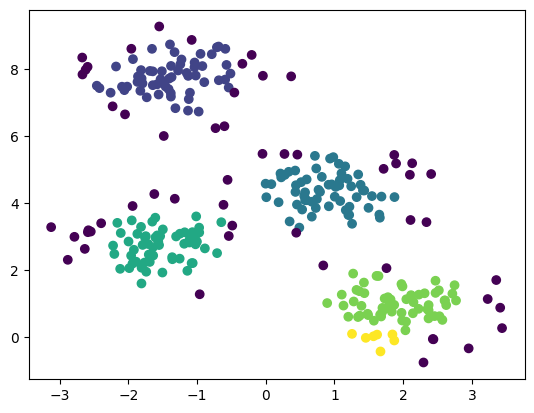

In [14]:
# Genera datos sintéticos
X1, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Ajusta modelo
dbscan = DBSCAN(eps=0.4, min_samples=6) # Define el modelo con los parámetros épsilon y minpts. 
#Modifica los parámetros para ver su comportamiento
labels = dbscan.fit_predict(X1) # Crea el modelo de dbscan

# Visualiza resultados
plt.scatter(X1[:, 0], X1[:, 1], c=labels, cmap='viridis')
plt.show()


## Otro ejemplo

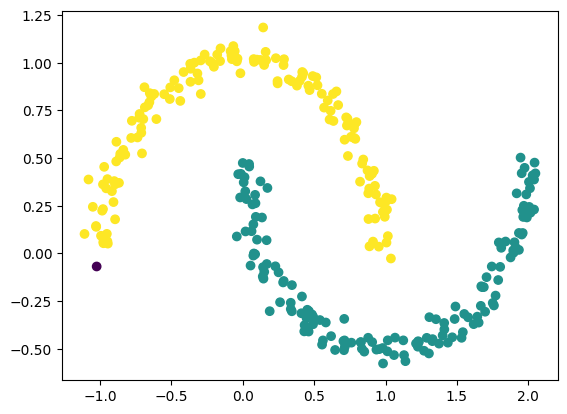

In [21]:
# Genera datos sintéticos en forma de luna
X, _ = make_moons(n_samples=300, noise=0.05)
# Ajusta modelo
dbscan = DBSCAN(eps=0.13, min_samples=4) # Define el modelo con los parámetros épsilon y minpts. 
#Modifica los parámetros para ver su comportamiento
labels = dbscan.fit_predict(X) # Crea el modelo de dbscan

# Visualiza resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()

## Campos donde es utilizado

### 1. Visión por Computadora y Procesamiento de Imágenes
* Segmentación de imágenes: DBSCAN puede agrupar píxeles según su similitud en características como el color, textura o localización.
* Detección de objetos: Se usa para identificar objetos en imágenes o vídeos, especialmente cuando los objetos tienen formas complejas o irregulares.
* Reconocimiento de patrones: DBSCAN ayuda a detectar patrones en datos visuales donde la forma de los objetos no es predecible ni simétrica.

### 2. Sistemas de Información Geográfica (SIG)
* Análisis de datos espaciales: DBSCAN es ideal para encontrar clusters de eventos o puntos geográficos, como grupos de terremotos, incendios forestales o crímenes en una ciudad.
* Detección de áreas densamente pobladas: Se utiliza para identificar áreas densas de puntos en mapas.
* Mapas de calor: Identificar zonas "calientes" en la distribución espacial de fenómenos geográficos.

### 3. Biología y Genómica
* Análisis de datos genéticos: En estudios de secuenciación de ADN y ARN, DBSCAN se utiliza para agrupar secuencias genéticas similares y detectar patrones en conjuntos de datos biológicos masivos.
* Agrupación celular: En la bioinformática, DBSCAN es útil para agrupar células según su expresión genética en datos de secuenciación de una sola célula.

### 4. Astrofísica
* Análisis de datos astronómicos: DBSCAN se aplica para identificar clusters de estrellas, galaxias o cúmulos estelares en datos astronómicos.
* Detección de exoplanetas: Se utiliza para agrupar datos astronómicos donde los planetas u objetos celestes tienen distribuciones densas irregulares.

### 5. Redes Sociales y Análisis de Datos
* Agrupación de usuarios: En función de comportamientos similares o conexiones cercanas.
* Análisis de grafos: En redes sociales, se utiliza para identificar comunidades densas en redes de relaciones, como amigos o seguidores.
* Detección de bots o usuarios anómalos: En el análisis de actividad de redes sociales, DBSCAN puede detectar usuarios con comportamientos atípicos.

### 6. Seguridad Informática
* Detección de anomalías: Se utiliza para identificar comportamientos atípicos en tráfico de red o intentos de intrusión que no se ajustan a patrones normales.
* Análisis de malware: En la agrupación de patrones de comportamiento de malware, DBSCAN puede identificar variantes similares en grandes cantidades de datos de seguridad.

### 7. Economía y Finanzas
* Análisis de mercado: Puede detectar clusters de actividad financiera, como transacciones sospechosas, tendencias de precios o agrupaciones de clientes en mercados de alta densidad.
* Detección de fraude: Agrupa transacciones que son significativamente diferentes a las normales, lo que ayuda a identificar fraudes potenciales.

### 8. Robótica
* Mapeo y navegación: En robótica, DBSCAN se utiliza para crear mapas de entornos y detectar obstáculos o áreas donde el robot puede moverse con seguridad.
* Agrupación de puntos en nubes 3D: En la visión por computadora y robótica, DBSCAN puede agrupar puntos 3D obtenidos de sensores, como LIDAR, para identificar objetos y obstáculos.

### 9. Minería de Datos
* Extracción de conocimiento en grandes bases de datos: DBSCAN es común en la minería de datos para descubrir patrones ocultos, como clusters de clientes, productos similares o comportamientos atípicos en bases de datos grandes y heterogéneas.
* Análisis de comportamiento de clientes: Ayuda a identificar grupos de clientes con comportamientos de compra similares.

### 10. Análisis de Tráfico y Movilidad
* Agrupación de trayectorias: DBSCAN se usa para agrupar trayectorias de vehículos, aviones o barcos, identificando rutas comunes o desviaciones atípicas.
* Detección de áreas congestionadas: Se puede utilizar para identificar puntos calientes de congestión en sistemas de transporte o movilidad urbana.

## $K$-Means vs DBSCAN

<img src="images/dbscan/dbscan_vs_kmeans.png" alt="Tipos de puntos en DBSCAN" width="900">

### Extra
**Aprendizaje transductivo**
* Se enfoca en hacer predicciones directamente sobre un conjunto específico de datos no etiquetados, pero también puede usar datos etiquetados
* Se enfoca en el conjunto de datos específico y no busca generalizar a nuevos datos.

# Referencias
* Demo of HDBSCAN clustering algorithm. (s. f.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/cluster/plot_hdbscan.html#sphx-glr-auto-examples-cluster-plot-hdbscan-py
* 2.3. Clustering. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/clustering.html#dbscan